In [471]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

warnings.simplefilter('ignore')
%matplotlib inline

In [472]:
df = pd.read_csv('datasets/spaceship/train.csv')
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


## Converting bool objects into int64

In [473]:
df['Transported'] = df['Transported'].map({True: 1, False: 0})
df['CryoSleep'] = df['CryoSleep'].map({True: 1, False: 0})
df['VIP'] = df['VIP'].map({True: 1, False: 0})

In [474]:
df.describe()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,8476.000000,8514.000000,8490.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000
mean,0.358306,28.827930,0.023439,224.687617,458.077203,173.729169,311.138778,304.854791,0.503624
std,0.479531,14.489021,0.151303,666.717663,1611.489240,604.696458,1136.705535,1145.717189,0.500016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,38.000000,0.000000,47.000000,76.000000,27.000000,59.000000,46.000000,1.000000
max,1.000000,79.000000,1.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000


In [475]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   float64
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   float64
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   int64  
dtypes: float64(8), int64(1), object(5)
memory usage: 950.9+ KB


## Dispose of useless columns

In [476]:
train_df = df.drop(columns=['PassengerId', 'FoodCourt', 'ShoppingMall', 'Spa',
                            'Name', 'Transported', 'RoomService', 'VRDeck', 'Cabin'])
answers = df['Transported']
train_df

,HomePlanet,CryoSleep,Destination,Age,VIP
0,Europa,0.0,TRAPPIST-1e,39.0,0.0
1,Earth,0.0,TRAPPIST-1e,24.0,0.0
2,Europa,0.0,TRAPPIST-1e,58.0,1.0
3,Europa,0.0,TRAPPIST-1e,33.0,0.0
4,Earth,0.0,TRAPPIST-1e,16.0,0.0
...,...,...,...,...,...
8688,Europa,0.0,55 Cancri e,41.0,1.0
8689,Earth,1.0,PSO J318.5-22,18.0,0.0
8690,Earth,0.0,TRAPPIST-1e,26.0,0.0
8691,Europa,0.0,55 Cancri e,32.0,0.0


## Encoding object values

In [477]:
label_encoder = LabelEncoder()
train_df['HomePlanet'] = label_encoder.fit_transform(train_df['HomePlanet'])
train_df['Destination'] = label_encoder.fit_transform(train_df['Destination'])

In [478]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HomePlanet   8693 non-null   int64  
 1   CryoSleep    8476 non-null   float64
 2   Destination  8693 non-null   int64  
 3   Age          8514 non-null   float64
 4   VIP          8490 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 339.7 KB


In [479]:
train_df

,HomePlanet,CryoSleep,Destination,Age,VIP
0,1,0.0,2,39.0,0.0
1,0,0.0,2,24.0,0.0
2,1,0.0,2,58.0,1.0
3,1,0.0,2,33.0,0.0
4,0,0.0,2,16.0,0.0
...,...,...,...,...,...
8688,1,0.0,0,41.0,1.0
8689,0,1.0,1,18.0,0.0
8690,0,0.0,2,26.0,0.0
8691,1,0.0,0,32.0,0.0


## Replacing NaN values using sklearn.SimpleImputer

In [480]:
# Saving column names
names = list(train_df.columns)

# Training imputing model
imp_mean = SimpleImputer(strategy='mean')
imp_mean.fit(train_df)

# Replacing Nan values
train_df = pd.DataFrame(imp_mean.transform(train_df))

# Giving columns their names back
train_df.columns = names
train_df

,HomePlanet,CryoSleep,Destination,Age,VIP
0,1.0,0.0,2.0,39.0,0.0
1,0.0,0.0,2.0,24.0,0.0
2,1.0,0.0,2.0,58.0,1.0
3,1.0,0.0,2.0,33.0,0.0
4,0.0,0.0,2.0,16.0,0.0
...,...,...,...,...,...
8688,1.0,0.0,0.0,41.0,1.0
8689,0.0,1.0,1.0,18.0,0.0
8690,0.0,0.0,2.0,26.0,0.0
8691,1.0,0.0,0.0,32.0,0.0


In [481]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HomePlanet   8693 non-null   float64
 1   CryoSleep    8693 non-null   float64
 2   Destination  8693 non-null   float64
 3   Age          8693 non-null   float64
 4   VIP          8693 non-null   float64
dtypes: float64(5)
memory usage: 339.7 KB


## Training DecisionTreeClassifier on our model

In [482]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=30, random_state=17)
clf_tree.fit(train_df, answers)
print(f"Accuracy: {round(clf_tree.score(train_df, answers), 5) * 100}%")

Accuracy: 77.821%


In [483]:
# Preparing predicted values
predicted = clf_tree.predict(train_df)
predicted = pd.DataFrame(predicted)
predicted.columns=['Predicted']

# Creating new DataFrame
new_df = predicted.join(answers)
new_df

,Predicted,Transported
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
8688,1,0
8689,1,0
8690,0,1
8691,0,0


### Parameters for DecisionTreeClassifier

Correlation: 0.5675345563017561
Mean Squared Error: 1928
Accuracy: 77.821%
Tree Depth: 23


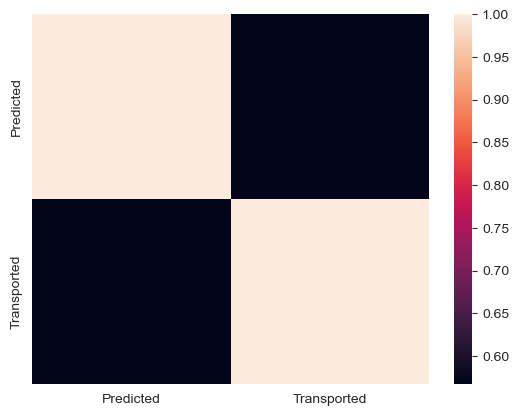

In [484]:
sns.heatmap(new_df.corr())
print(f"Correlation: {new_df.corr()['Predicted'][1]}")
mse = np.sum((answers - pd.Series(predicted['Predicted'])) ** 2)
print(f"Mean Squared Error: {np.sum((answers - pd.Series(predicted['Predicted'])) ** 2)}")
print(f"Accuracy: {round(1 - mse / sum(answers.value_counts()), 5) * 100}%")
print(f"Tree Depth: {clf_tree.get_depth()}")

## Training DecisionTreeRegressor on our model

In [485]:
clf_tree = DecisionTreeRegressor(max_depth=30, random_state=17)
clf_tree.fit(train_df, answers)

DecisionTreeRegressor(max_depth=30, random_state=17)

In [486]:
# Preparing predicted values
predicted = clf_tree.predict(train_df)
predicted = pd.DataFrame(predicted)
predicted.columns=['Predicted']
predicted['Predicted'] = predicted['Predicted'].apply(lambda x: round(x))

# Creating new DataFrame
new_df = predicted.join(answers)
new_df

,Predicted,Transported
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
8688,1,0
8689,1,0
8690,0,1
8691,0,0


### Parameters for DecisionTreeRegressor


Correlation: 0.5675345563017561
Mean Squared Error: 1928
Accuracy: 77.821%
Tree Depth: 23


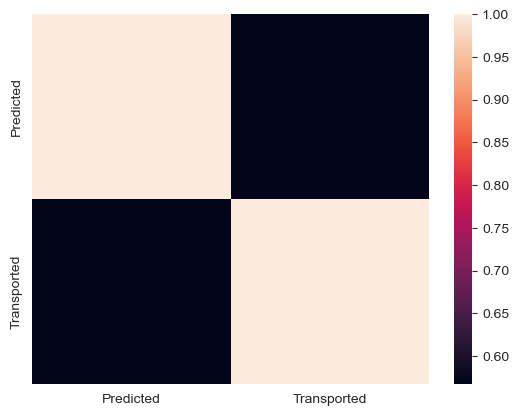

In [487]:
sns.heatmap(new_df.corr())
print(f"Correlation: {new_df.corr()['Predicted'][1]}")
mse = np.sum((answers - pd.Series(predicted['Predicted'])) ** 2)
print(f"Mean Squared Error: {np.sum((answers - pd.Series(predicted['Predicted'])) ** 2)}")
print(f"Accuracy: {round(1 - mse / sum(answers.value_counts()), 5) * 100}%")
print(f"Tree Depth: {clf_tree.get_depth()}")

## Training kNN algorithm

In [488]:
neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(train_df, answers)
print(f"Accuracy: {round(neigh.score(train_df, answers), 5) * 100}%")

Accuracy: 74.048%


In [489]:
# Preparing predicted values
predicted = neigh.predict(train_df)
predicted = pd.DataFrame(predicted)
predicted.columns=['Predicted']

# Creating new DataFrame
new_df = predicted.join(answers)
new_df

,Predicted,Transported
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
8688,0,0
8689,1,0
8690,0,1
8691,0,0


### Parameters for kNN


Correlation: 0.4885285797826907
Mean Squared Error: 2256
Accuracy: 74.048%


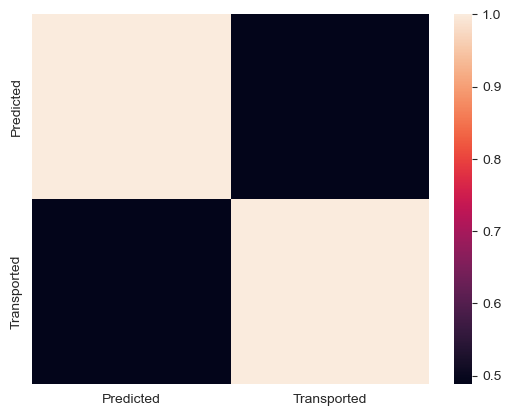

In [490]:
sns.heatmap(new_df.corr())
print(f"Correlation: {new_df.corr()['Predicted'][1]}")
mse = np.sum((answers - pd.Series(predicted['Predicted'])) ** 2)
print(f"Mean Squared Error: {np.sum((answers - pd.Series(predicted['Predicted'])) ** 2)}")
print(f"Accuracy: {round(1 - mse / sum(answers.value_counts()), 5) * 100}%")

## Training GradientBoostingClassifier

In [491]:
clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.5,
                                 max_depth=30, random_state=17)
clf.fit(train_df, answers)
print(f"Accuracy: {round(clf.score(train_df, answers), 5) * 100}%")

Accuracy: 77.821%


In [492]:
# Preparing predicted values
predicted = clf.predict(train_df)
predicted = pd.DataFrame(predicted)
predicted.columns=['Predicted']

# Creating new DataFrame
new_df = predicted.join(answers)
new_df

,Predicted,Transported
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
8688,1,0
8689,1,0
8690,0,1
8691,0,0


Correlation: 0.5673752463469353
Mean Squared Error: 1928
Accuracy: 77.821%


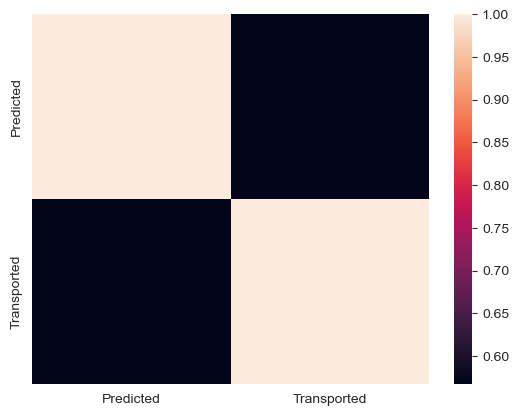

In [493]:
sns.heatmap(new_df.corr())
print(f"Correlation: {new_df.corr()['Predicted'][1]}")
mse = np.sum((answers - pd.Series(predicted['Predicted'])) ** 2)
print(f"Mean Squared Error: {np.sum((answers - pd.Series(predicted['Predicted'])) ** 2)}")
print(f"Accuracy: {round(1 - mse / sum(answers.value_counts()), 5) * 100}%")